# UCS Satellite Database Data Analysis
Weekly challenge: Week 2  
Date: 8/3/2022

**Data source**  
UCS Satellite Database  
https://www.ucsusa.org/resources/satellite-database#.VF_jIlPF8Wg

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data file

In [2]:
df = pd.read_csv('UCS-Satellite-Database-1-1-2022.csv')

In [3]:
df.head(3)

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAUSat-4,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Review and clean the data

In [4]:
df.columns

Index(['Name of Satellite, Alternate Names',
       'Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', ' Dry Mass (kg.) ', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments', 'Unnamed: 28',
       'Source Used for Orbital Data', 'Source', 'Source.1', 'Source.2',
       'Source.3', 'Source.4', 'Source.5', 'Source.6', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 67 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  4852 non-null   object 
 1   Current Official Name of Satellite  4852 non-null   object 
 2   Country/Org of UN Registry          4851 non-null   object 
 3   Country of Operator/Owner           4852 non-null   object 
 4   Operator/Owner                      4852 non-null   object 
 5   Users                               4852 non-null   object 
 6   Purpose                             4852 non-null   object 
 7   Detailed Purpose                    1044 non-null   object 
 8   Class of Orbit                      4852 non-null   object 
 9   Type of Orbit                       4222 non-null   object 
 10  Longitude of GEO (degrees)          4852 non-null   float64
 11  Perigee (km)                        4852 no

In [6]:
# There are columns that are not required for my analysis so I will remove those columns and keep only the following columns.
# I also will remove 3 columns with many missing values.

cols_to_keep = ['Current Official Name of Satellite', 'Country/Org of UN Registry', 'Country of Operator/Owner',
                'Operator/Owner', 'Users', 'Purpose', 'Class of Orbit', 'Type of Orbit', 'Longitude of GEO (degrees)',
                'Perigee (km)', 'Apogee (km)', 'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
                'Launch Mass (kg.)', 'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor', 'Country of Contractor',
                'Launch Site', 'Launch Vehicle', 'NORAD Number']

In [7]:
df = pd.read_csv('UCS-Satellite-Database-1-1-2022.csv', usecols = cols_to_keep)

In [8]:
# I am also changing long column names to short names

df.columns = ['Name of Satellite', 'Country of UN Registry', 'Country of Operator/Owner', 'Operator/Owner',
              'Users', 'Purpose', 'Class of Orbit', 'Type of Orbit', 'Long of GEO (deg)', 'Perigee (km)',
              'Apogee (km)', 'Eccentricity', 'Inclination (deg)', 'Period (min)', 'Launch Mass (kg)',
              'Date of Launch', 'Expected Lifetime (yrs)', 'Contractor', 'Country of Contractor', 'Launch Site',
              'Launch Vehicle', 'NORAD Number']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name of Satellite          4852 non-null   object 
 1   Country of UN Registry     4851 non-null   object 
 2   Country of Operator/Owner  4852 non-null   object 
 3   Operator/Owner             4852 non-null   object 
 4   Users                      4852 non-null   object 
 5   Purpose                    4852 non-null   object 
 6   Class of Orbit             4852 non-null   object 
 7   Type of Orbit              4222 non-null   object 
 8   Long of GEO (deg)          4852 non-null   float64
 9   Perigee (km)               4852 non-null   object 
 10  Apogee (km)                4852 non-null   object 
 11  Eccentricity               4852 non-null   float64
 12  Inclination (deg)          4852 non-null   float64
 13  Period (min)               4837 non-null   float

In [10]:
# Removing "," from the numbers in the following columns

cols = ['Long of GEO (deg)','Perigee (km)','Apogee (km)','Launch Mass (kg)']

for x in cols:
    df[x] = df[x].astype(str).str.replace(',','')

In [11]:
df[['Long of GEO (deg)','Perigee (km)','Apogee (km)','Launch Mass (kg)']]

,Long of GEO (deg),Perigee (km),Apogee (km),Launch Mass (kg)
0,0.0,566,576,22
1,0.0,497,517,5
2,0.0,442,687,1
3,75.0,35778,35793,6330
4,-75.0,35700,35700,1800
...,...,...,...,...
4849,0.0,487,500,2630
4850,0.0,487,499,2630
4851,0.0,552,572,46
4852,nan,nan,nan,nan


In [12]:
# Removing the last 2 rows of the dataframe

df.drop(df.tail(2).index, inplace = True)

In [13]:
# Changing data types of some of the columns

df['Long of GEO (deg)'] = df['Long of GEO (deg)'].astype('float')
df['Perigee (km)'] = df['Perigee (km)'].astype('int')
df['Apogee (km)'] = df['Apogee (km)'].astype('int')
df['Launch Mass (kg)'] = df['Launch Mass (kg)'].astype('float')
df['Date of Launch'] = pd.to_datetime(df['Date of Launch'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4852 entries, 0 to 4851
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Name of Satellite          4852 non-null   object        
 1   Country of UN Registry     4851 non-null   object        
 2   Country of Operator/Owner  4852 non-null   object        
 3   Operator/Owner             4852 non-null   object        
 4   Users                      4852 non-null   object        
 5   Purpose                    4852 non-null   object        
 6   Class of Orbit             4852 non-null   object        
 7   Type of Orbit              4222 non-null   object        
 8   Long of GEO (deg)          4852 non-null   float64       
 9   Perigee (km)               4852 non-null   int32         
 10  Apogee (km)                4852 non-null   int32         
 11  Eccentricity               4852 non-null   float64       
 12  Inclin

## Exploratory Analysis and Visualization

Columns I will analyze:

1. Country of Operator/Owner - DONE
2. Operator/Owner - DONE
3. Users - DONE
4. Purpose - DONE
5. Class of Orbit - DONE
6. Type of Orbit
7. Perigee  
8. Apogee  
9. Eccentricity  
10. Inclination  
11. Period  
12. Launch Mass  
Date of Launch  
Expected Lifetime  
Contractor  
Country of Contractor  
Launch Site  
Launch Vehicle  

### 1. Country of Operator/Owner

**Top 20 countries with number of satellites**

In [15]:
df['Country of Operator/Owner'].value_counts()

USA                           2926
China                          493
United Kingdom                 450
Russia                         167
Japan                           90
                              ... 
Jordan                           1
United Kingdom/Netherlands       1
Laos                             1
Morocco/Germany                  1
China/Italy                      1
Name: Country of Operator/Owner, Length: 105, dtype: int64

In [16]:
top_20_countries = pd.DataFrame(df['Country of Operator/Owner'].value_counts()[:20].sort_values(ascending = False)).reset_index()
top_20_countries.columns = ['Country','# of satellites']

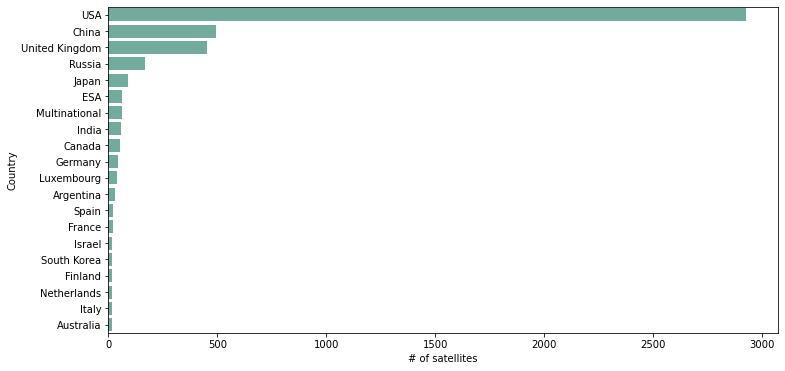

In [17]:
plt.figure(figsize = (12,6))

sns.barplot(
    x="# of satellites", 
    y="Country", 
    data=top_20_countries, 
    color='#69b3a2');

### 2. Operator/Owner

**Top 20 Operator/Owner with number of satellites**

In [18]:
df['Operator/Owner'].value_counts()

SpaceX                                                                          1815
OneWeb Satellites                                                                394
Planet Labs, Inc.                                                                188
Chinese Ministry of National Defense                                             134
Spire Global Inc.                                                                120
                                                                                ... 
China Aerospace Science and Industry Corporation (CASIC)                           1
China Aerospace Science and Technology Corporation (CASC)                          1
National Committee for Disaster Reduction and State Environmental Protection       1
Spacety                                                                            1
Mitsubishi Heavy Industries                                                        1
Name: Operator/Owner, Length: 600, dtype: int64

In [19]:
top_20_Operator_Owner = pd.DataFrame(df['Operator/Owner'].value_counts()[:20].sort_values(ascending = False)).reset_index()
top_20_Operator_Owner.columns = ['Operator_Owner','# of satellites']

In [20]:
top_20_Operator_Owner

,Operator_Owner,# of satellites
0,SpaceX,1815
1,OneWeb Satellites,394
2,"Planet Labs, Inc.",188
3,Chinese Ministry of National Defense,134
4,Spire Global Inc.,120
5,Swarm Technologies,119
6,Ministry of Defense,109
7,"Iridium Communications, Inc.",75
8,SES S.A.,48
9,Indian Space Research Organization (ISRO),44


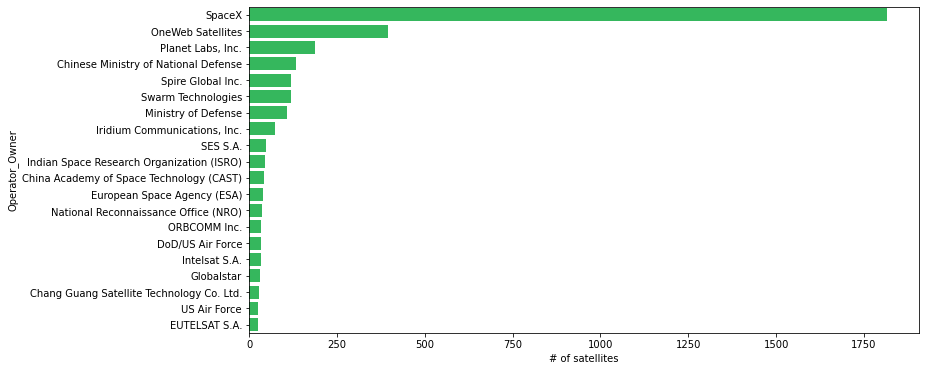

In [21]:
plt.figure(figsize = (12,6))

sns.barplot(
    x="# of satellites", 
    y="Operator_Owner", 
    data=top_20_Operator_Owner, 
    color='#20cc55');

**Operator/Owner grouped by descending country**

In [22]:
country_and_operator_owner = pd.DataFrame(df.groupby(['Country of Operator/Owner','Operator/Owner']).size()).reset_index()

In [23]:
country_and_operator_owner

,Country of Operator/Owner,Operator/Owner,0
0,Algeria,Algerian Space Agency (ASAL),4
1,Algeria,Algerian Space Agency (ASAL)/UK Space Agency,1
2,Argentina,Aprize Satellite Argentina,2
3,Argentina,"Aprize Satellite, Argentina",2
4,Argentina,ArSat,2
...,...,...,...
615,United Kingdom/Netherlands,Lacuna Space,1
616,Venezuela,Bolivarian Agency for Space Activities,2
617,Vietnam,Space Technology Institute-Vietnam Academy of ...,1
618,Vietnam,Vietnam National Space Center,2


In [24]:
# Renaming columns

country_and_operator_owner.columns = ['Country of Operator/Owner','Operator/Owner','# of satellites']

In [25]:
country_and_operator_owner

,Country of Operator/Owner,Operator/Owner,# of satellites
0,Algeria,Algerian Space Agency (ASAL),4
1,Algeria,Algerian Space Agency (ASAL)/UK Space Agency,1
2,Argentina,Aprize Satellite Argentina,2
3,Argentina,"Aprize Satellite, Argentina",2
4,Argentina,ArSat,2
...,...,...,...
615,United Kingdom/Netherlands,Lacuna Space,1
616,Venezuela,Bolivarian Agency for Space Activities,2
617,Vietnam,Space Technology Institute-Vietnam Academy of ...,1
618,Vietnam,Vietnam National Space Center,2


In [26]:
# Creating a series of countries with descending number of satellites

country_series = df['Country of Operator/Owner'].value_counts()

In [27]:
country_series

USA                           2926
China                          493
United Kingdom                 450
Russia                         167
Japan                           90
                              ... 
Jordan                           1
United Kingdom/Netherlands       1
Laos                             1
Morocco/Germany                  1
China/Italy                      1
Name: Country of Operator/Owner, Length: 105, dtype: int64

In [28]:
country_series.index

Index(['USA', 'China', 'United Kingdom', 'Russia', 'Japan', 'ESA',
       'Multinational', 'India', 'Canada', 'Germany',
       ...
       'Greece/United Kingdom', 'ESA/USA', 'United Kingdom/ESA',
       'ESA/USA/Russia', 'USA/France', 'Jordan', 'United Kingdom/Netherlands',
       'Laos', 'Morocco/Germany', 'China/Italy'],
      dtype='object', length=105)

In [29]:
# Rearranging the dataframe rows per country_series index

new_index = []

for country1 in country_series.index:
    temp_index = 0
        
    for country2 in country_and_operator_owner['Country of Operator/Owner']:

        if country1 == country2:
            new_index.append(country_and_operator_owner.index[temp_index])
        temp_index += 1

country_and_operator_owner = country_and_operator_owner.reindex(new_index)

In [30]:
country_and_operator_owner

,Country of Operator/Owner,Operator/Owner,# of satellites
411,USA,1Worldspace,1
412,USA,AMSAT-NA,2
413,USA,ANDESITE - Boston University,1
414,USA,Aerospace Corporation,17
415,USA,Air Force Research Laboratory,4
...,...,...,...
282,Jordan,Crown Prince Foundation,1
615,United Kingdom/Netherlands,Lacuna Space,1
288,Laos,Laos National Authority for Science and Techno...,1
303,Morocco/Germany,CTRS Morocco/Institut für Luft-und Raumfahrtte...,1


In [31]:
# Resetting the index

country_and_operator_owner_reset = country_and_operator_owner.reset_index()
country_and_operator_owner_reset

,index,Country of Operator/Owner,Operator/Owner,# of satellites
0,411,USA,1Worldspace,1
1,412,USA,AMSAT-NA,2
2,413,USA,ANDESITE - Boston University,1
3,414,USA,Aerospace Corporation,17
4,415,USA,Air Force Research Laboratory,4
...,...,...,...,...
615,282,Jordan,Crown Prince Foundation,1
616,615,United Kingdom/Netherlands,Lacuna Space,1
617,288,Laos,Laos National Authority for Science and Techno...,1
618,303,Morocco/Germany,CTRS Morocco/Institut für Luft-und Raumfahrtte...,1


In [32]:
# Deleting the old index

del country_and_operator_owner_reset['index']
country_and_operator_owner_reset

,Country of Operator/Owner,Operator/Owner,# of satellites
0,USA,1Worldspace,1
1,USA,AMSAT-NA,2
2,USA,ANDESITE - Boston University,1
3,USA,Aerospace Corporation,17
4,USA,Air Force Research Laboratory,4
...,...,...,...
615,Jordan,Crown Prince Foundation,1
616,United Kingdom/Netherlands,Lacuna Space,1
617,Laos,Laos National Authority for Science and Techno...,1
618,Morocco/Germany,CTRS Morocco/Institut für Luft-und Raumfahrtte...,1


### 3. Users

**Analysis of the satellite users**

In [33]:
df['Users'].nunique()

20

In [34]:
# Top 10 users

df['Users'].value_counts()[:10]

Commercial               3481
Government                505
Military                  410
Civil                     150
Government/Commercial      96
Military/Commercial        79
Military/Government        55
Government/Civil           45
Military/Civil              7
Commercial/Civil            5
Name: Users, dtype: int64

In [35]:
user = df['Users'].value_counts()[:10].index

In [36]:
num_satellites = df['Users'].value_counts()[:10].values

In [37]:
explode = [0, 0.1, 0, 0.1, 0, 0.2, 0, 0.3, 0, 0.6]

In [38]:
# Seaborn color palette to plot pie chart

colors = sns.color_palette('pastel')

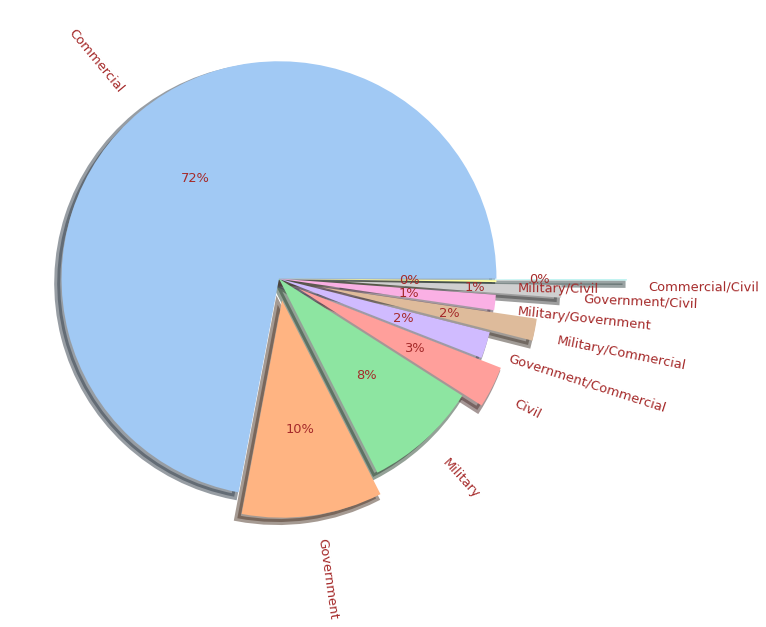

In [39]:
# create pie chart using matplotlib

plt.figure(figsize = (10,10))

plt.pie(num_satellites, labels=user, colors=colors, autopct='%.0f%%', explode=explode,
        shadow=True, startangle = 0, textprops = {'color': 'brown','fontsize':13},
        wedgeprops = {'linewidth': 6}, rotatelabels='true', frame = False, center = (0,0))
plt.show()

### 4. Purpose

**Analysis of purpose of the satellites**

In [40]:
df['Purpose'].nunique()

32

In [41]:
df['Purpose'].value_counts()

Communications                                    3122
Earth Observation                                 1013
Technology Development                             342
Navigation/Global Positioning                      140
Space Science                                       99
Technology Demonstration                            39
Earth Science                                       19
Navigation/Regional Positioning                     13
Surveillance                                         9
Earth Observation/Technology Development             7
Space Observation                                    7
Unknown                                              6
Communications/Maritime Tracking                     5
Communications/Technology Development                5
Earth Observation                                    4
Earth Observation/Communications                     2
Earth/Space Observation                              2
Technology Development/Educational                   2
Mission Ex

In [42]:
# Top 12 Purposes

df['Purpose'].value_counts()[:12]

Communications                              3122
Earth Observation                           1013
Technology Development                       342
Navigation/Global Positioning                140
Space Science                                 99
Technology Demonstration                      39
Earth Science                                 19
Navigation/Regional Positioning               13
Surveillance                                   9
Earth Observation/Technology Development       7
Space Observation                              7
Unknown                                        6
Name: Purpose, dtype: int64

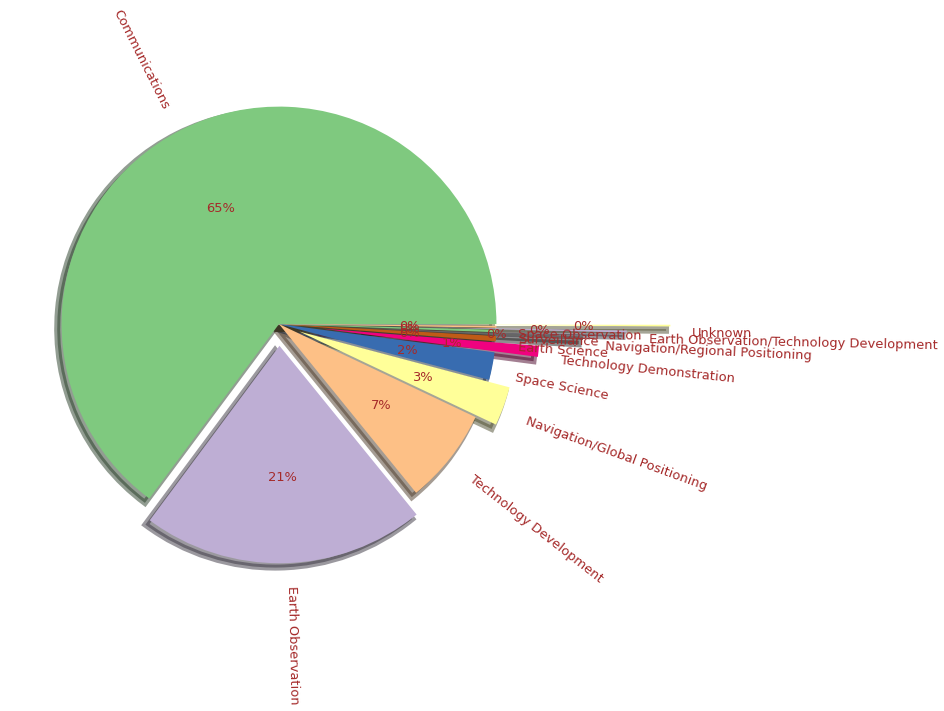

In [43]:
purpose = df['Purpose'].value_counts()[:12].index
num_satellites2 = df['Purpose'].value_counts()[:12].values
explode = [0, 0.1, 0, 0.1, 0, 0.2, 0, 0.4, 0, 0.6, 0, 0.8]

# Seaborn color palette to plot pie chart
#colors = sns.color_palette('muted', as_cmap=True)
#my_plt = sns.blend_palette(['red','green','yellow','orange','brown','blue'], 12)
#my_plt = sns.blend_palette(['blue','brown','orange','yellow','green','red'], 12)
my_plt = sns.color_palette("Accent")
#magma_r

# create pie chart using matplotlib

plt.figure(figsize = (10,10))

plt.pie(num_satellites2, labels=purpose, colors=my_plt, autopct='%.0f%%', explode=explode,
        shadow=True, startangle = 0, textprops = {'color': 'brown','fontsize':13},
        wedgeprops = {'linewidth': 6}, rotatelabels='true', frame = False, center = (0,0))
plt.show()

### 5. Class of Orbit

**Analysis of Class of Orbit**

In [44]:
df['Class of Orbit'].nunique()

4

In [45]:
df['Class of Orbit'].value_counts()

LEO           4078
GEO            574
MEO            141
Elliptical      59
Name: Class of Orbit, dtype: int64

In [46]:
class_orb = pd.DataFrame(df['Class of Orbit'].value_counts().sort_values(ascending = False)).reset_index()
class_orb.columns = ['Class of Orbit','# of satellites']
class_orb

,Class of Orbit,# of satellites
0,LEO,4078
1,GEO,574
2,MEO,141
3,Elliptical,59


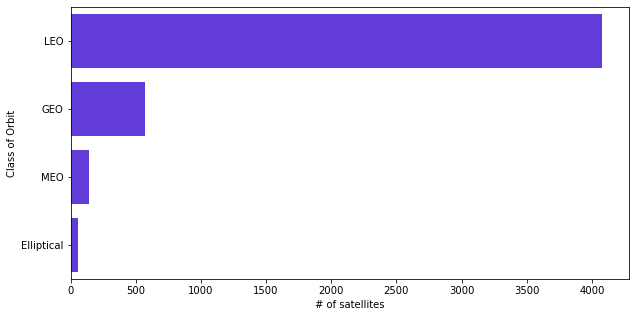

In [47]:
plt.figure(figsize = (10,5))

sns.barplot(
    x="# of satellites", 
    y="Class of Orbit", 
    data=class_orb, 
    color='#5522f0');

### 6. Type of Orbit

**Analysis of Type of Orbit**

In [48]:
df['Type of Orbit'].nunique()

9

In [49]:
df['Type of Orbit'].value_counts()

Non-Polar Inclined       2255
Sun-Synchronous          1247
Polar                     641
Equatorial                 38
Molniya                    22
Deep Highly Eccentric       9
Elliptical                  8
Sad-Synchronous             1
Cislunar                    1
Name: Type of Orbit, dtype: int64

In [50]:
type_orb = pd.DataFrame(df['Type of Orbit'].value_counts().sort_values(ascending = False)).reset_index()
type_orb.columns = ['Type of Orbit','# of satellites']
type_orb

,Type of Orbit,# of satellites
0,Non-Polar Inclined,2255
1,Sun-Synchronous,1247
2,Polar,641
3,Equatorial,38
4,Molniya,22
5,Deep Highly Eccentric,9
6,Elliptical,8
7,Sad-Synchronous,1
8,Cislunar,1


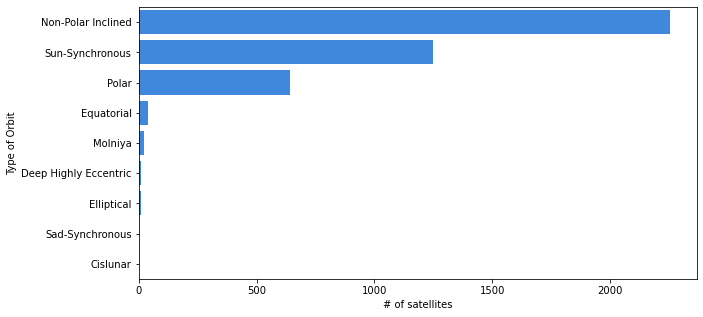

In [51]:
plt.figure(figsize = (10,5))

sns.barplot(
    x="# of satellites", 
    y="Type of Orbit",
    data=type_orb, 
    color='#2586f6');

### 7. Perigee  ||  8. Apogee

<AxesSubplot:xlabel='Apogee (km)', ylabel='Perigee (km)'>

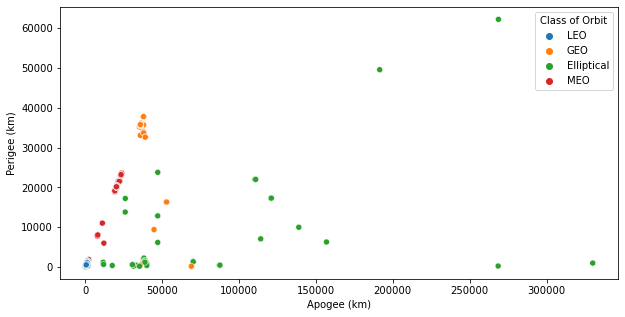

In [52]:
plt.figure(figsize = (10,5))

sns.scatterplot(y="Perigee (km)",
                    x="Apogee (km)",
                    hue = 'Class of Orbit',
                    data=df)

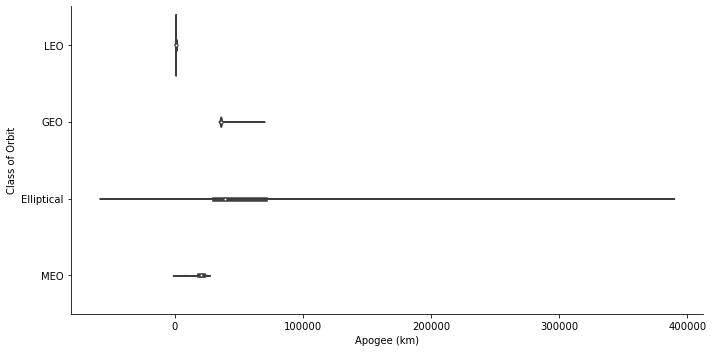

In [53]:
sns.catplot(data = df, x = 'Apogee (km)', y = 'Class of Orbit', kind = 'violin', aspect = 2)

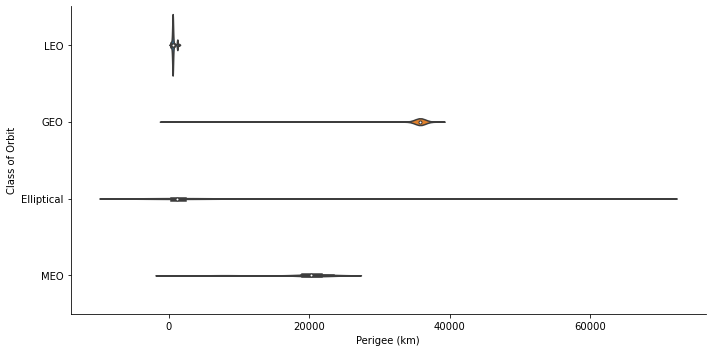

In [54]:
sns.catplot(data = df, x = 'Perigee (km)', y = "Class of Orbit", kind = 'violin', aspect = 2)

In [55]:
df.corr()

,Long of GEO (deg),Perigee (km),Apogee (km),Eccentricity,Inclination (deg),Period (min),Launch Mass (kg),Expected Lifetime (yrs),NORAD Number
Long of GEO (deg),1.000000,0.219096,0.170449,0.004618,-0.151860,0.183023,0.096265,0.090607,0.009862
Perigee (km),0.219096,1.000000,0.790510,0.001771,-0.704425,0.848285,0.720345,0.788653,-0.488272
Apogee (km),0.170449,0.790510,1.000000,0.481438,-0.570311,0.976018,0.589122,0.633012,-0.450862
Eccentricity,0.004618,0.001771,0.481438,1.000000,-0.052530,0.322778,0.101071,0.023152,-0.139201
Inclination (deg),-0.151860,-0.704425,-0.570311,-0.052530,1.000000,-0.607857,-0.524625,-0.604763,0.249283
Period (min),0.183023,0.848285,0.976018,0.322778,-0.607857,1.000000,0.620954,0.679925,-0.453680
Launch Mass (kg),0.096265,0.720345,0.589122,0.101071,-0.524625,0.620954,1.000000,0.678059,-0.446788
Expected Lifetime (yrs),0.090607,0.788653,0.633012,0.023152,-0.604763,0.679925,0.678059,1.000000,-0.486313
NORAD Number,0.009862,-0.488272,-0.450862,-0.139201,0.249283,-0.453680,-0.446788,-0.486313,1.000000


<AxesSubplot:>

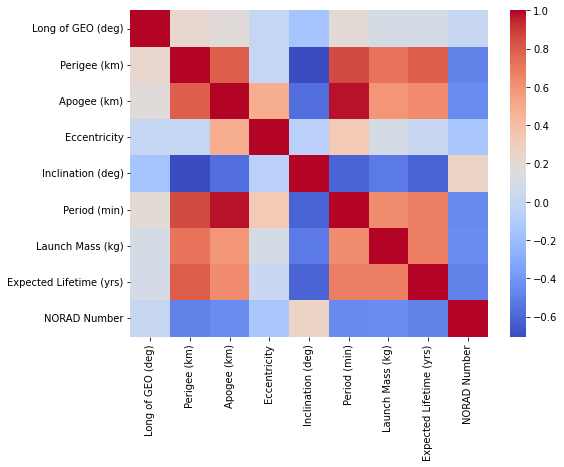

In [56]:
plt.figure(figsize = (8,6))

sns.heatmap(data = df.corr(), cmap = 'coolwarm') 

In [57]:
df['Apogee (km)'].value_counts()

561     755
551     501
1202    220
280     177
1220    173
       ... 
682       1
951       1
949       1
957       1
773       1
Name: Apogee (km), Length: 767, dtype: int64

<AxesSubplot:xlabel='Apogee (km)', ylabel='Count'>

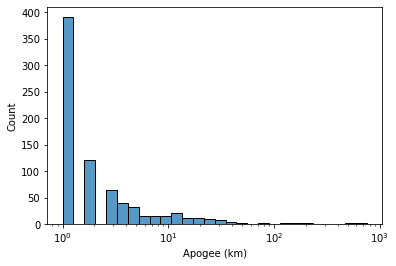

In [58]:
sns.histplot(df['Apogee (km)'].value_counts(), log_scale = True)

In [59]:
df['Perigee (km)'].value_counts()

548      983
549      316
1200     220
1215     173
260      119
        ... 
62200      1
401        1
35800      1
35549      1
748        1
Name: Perigee (km), Length: 770, dtype: int64

<AxesSubplot:xlabel='Perigee (km)', ylabel='Count'>

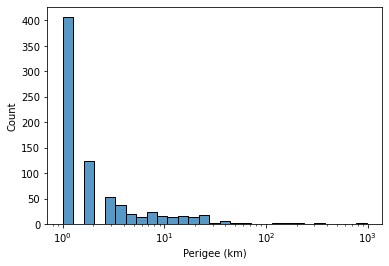

In [60]:
sns.histplot(df['Perigee (km)'].value_counts(), log_scale = True)

### 9. Eccentricity

In [61]:
df['Eccentricity'].value_counts()

0.000939    750
0.000145    307
0.000217    235
0.000132    219
0.000329    173
           ... 
0.678000      1
0.000216      1
0.000651      1
0.003780      1
0.000702      1
Name: Eccentricity, Length: 771, dtype: int64

<AxesSubplot:ylabel='Density'>

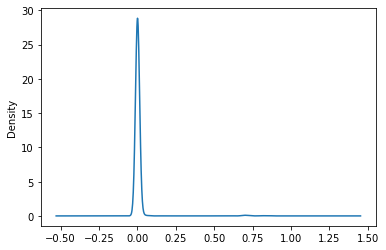

In [62]:
df['Eccentricity'].plot(kind = 'kde')

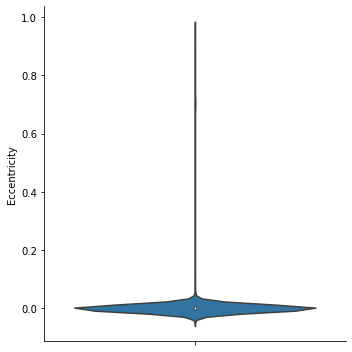

In [63]:
sns.catplot(data = df, y = 'Eccentricity', kind = 'violin', height=5, aspect = 1)

### 10. Inclination

In [64]:
df['Inclination (deg)'].value_counts()

53.00    1557
97.50     526
87.40     387
53.20     151
97.70      98
         ... 
27.10       1
86.50       1
15.20       1
53.95       1
98.56       1
Name: Inclination (deg), Length: 437, dtype: int64

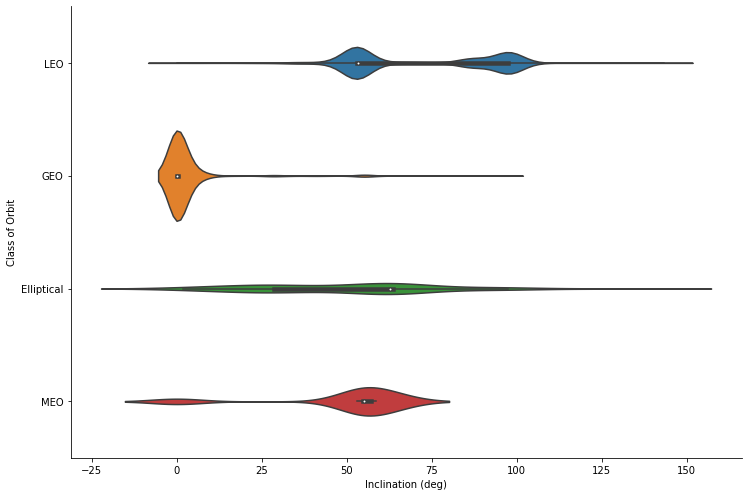

In [65]:
sns.catplot(data = df, x='Inclination (deg)', y = "Class of Orbit", kind = 'violin', height=7, aspect = 1.5)

<AxesSubplot:xlabel='Inclination (deg)', ylabel='Count'>

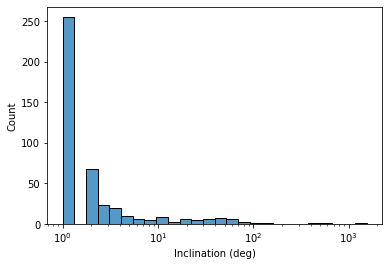

In [66]:
sns.histplot(df['Inclination (deg)'].value_counts(), log_scale = True)

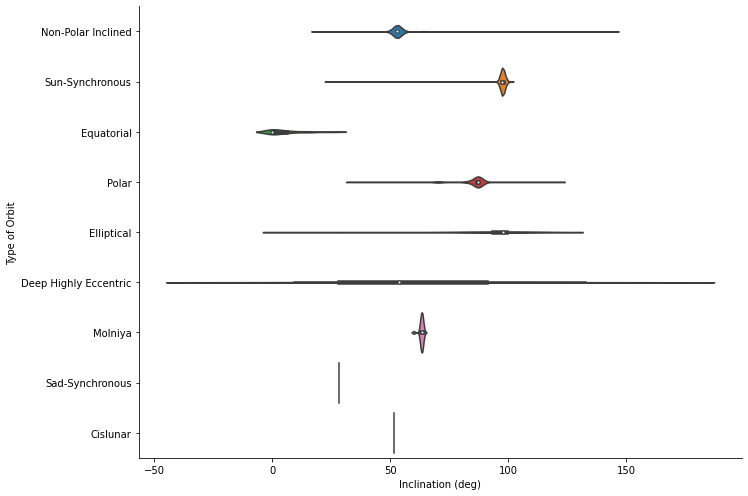

In [67]:
sns.catplot(data = df, x='Inclination (deg)', y = "Type of Orbit", kind = 'violin', height=7, aspect = 1.5)

### 11. Period

In [68]:
df['Period (min)'].value_counts()

95.60      1322
1436.10     188
94.50       188
95.20       152
93.50       152
           ... 
115.87        1
116.02        1
98.35         1
98.42         1
97.35         1
Name: Period (min), Length: 580, dtype: int64

<AxesSubplot:xlabel='Period (min)', ylabel='Count'>

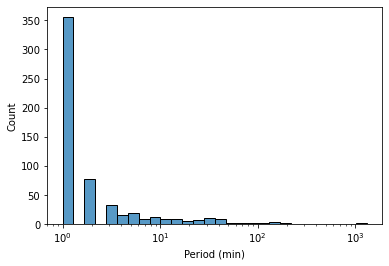

In [69]:
sns.histplot(df['Period (min)'].value_counts(), log_scale = True)

### 12. Launch Mass

In [70]:
df['Launch Mass (kg)'].value_counts()

260.0     1352
227.0      464
148.0      395
4.0        347
2.0        146
          ... 
3298.0       1
5493.0       1
3515.0       1
4690.0       1
2536.0       1
Name: Launch Mass (kg), Length: 558, dtype: int64

<AxesSubplot:xlabel='Launch Mass (kg)', ylabel='Count'>

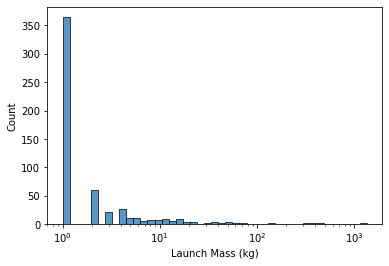

In [71]:
sns.histplot(df['Launch Mass (kg)'].value_counts(), log_scale = True)

<AxesSubplot:xlabel='Launch Mass (kg)', ylabel='Perigee (km)'>

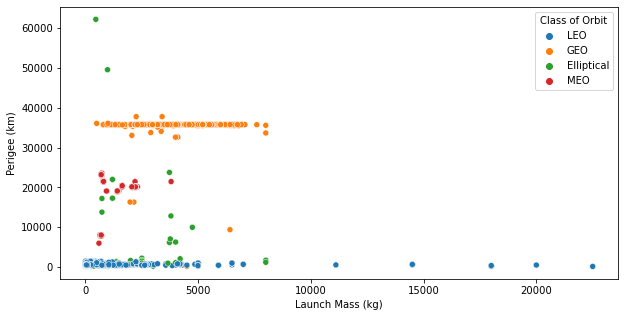

In [72]:
plt.figure(figsize = (10,5))

sns.scatterplot(y="Perigee (km)",
                    x="Launch Mass (kg)",
                    hue="Class of Orbit",
                    data=df)

<AxesSubplot:xlabel='Launch Mass (kg)', ylabel='Period (min)'>

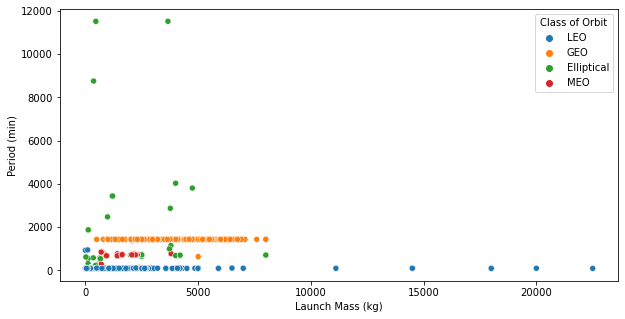

In [73]:
plt.figure(figsize = (10,5))

sns.scatterplot(y="Period (min)",
                    x="Launch Mass (kg)",
                    hue="Class of Orbit",
                    data=df)

<AxesSubplot:xlabel='Launch Mass (kg)', ylabel='Inclination (deg)'>

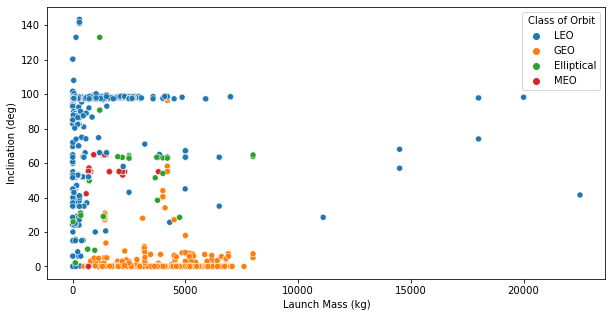

In [74]:
plt.figure(figsize = (10,5))

sns.scatterplot(y="Inclination (deg)",
                    x="Launch Mass (kg)",
                    hue="Class of Orbit",
                    data=df)

### 13. Date of Launch

In [75]:
df['Date of Launch'].value_counts()

2021-01-24    132
2021-06-30     88
2021-03-14     66
2020-06-13     63
2021-02-04     61
             ... 
2016-04-28      1
2018-04-11      1
2003-10-17      1
2016-01-17      1
2012-01-09      1
Name: Date of Launch, Length: 1111, dtype: int64

<AxesSubplot:xlabel='Date of Launch', ylabel='Count'>

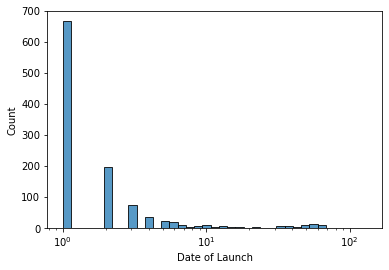

In [76]:
sns.histplot(df['Date of Launch'].value_counts(), log_scale = True)

<AxesSubplot:xlabel='Date of Launch'>

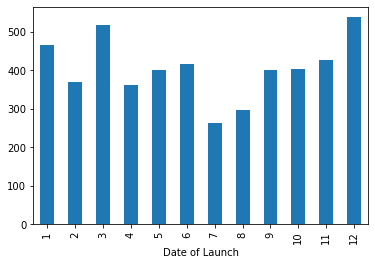

In [77]:
df["Date of Launch"].groupby(df["Date of Launch"].dt.month).count().plot(kind="bar")

<AxesSubplot:xlabel='Date of Launch'>

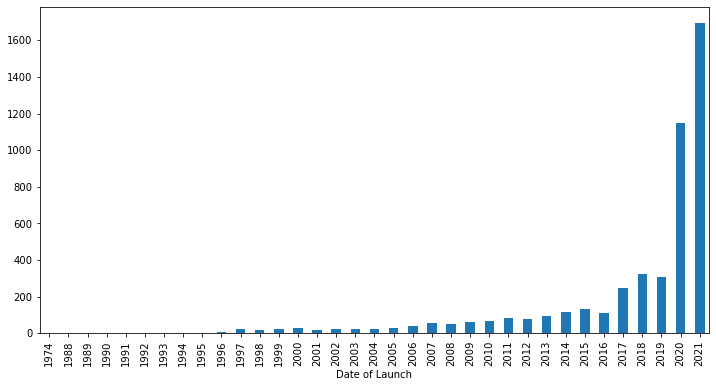

In [78]:
plt.figure(figsize = (12,6))

df["Date of Launch"].groupby(df["Date of Launch"].dt.year).count().plot(kind="bar")

<AxesSubplot:xlabel='Date of Launch', ylabel='Launch Site'>

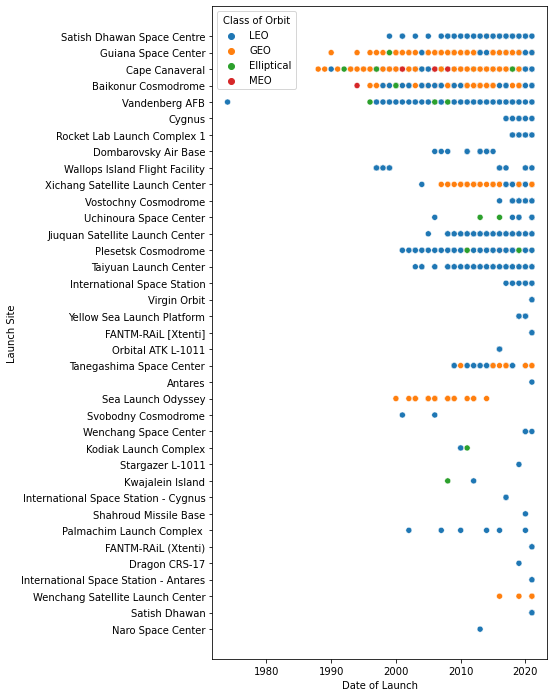

In [79]:
plt.figure(figsize = (6,12))

sns.scatterplot(y="Launch Site",
                    x=df['Date of Launch'].dt.year,
                    hue="Class of Orbit",
                    data=df)

<AxesSubplot:xlabel='Date of Launch', ylabel='Launch Mass (kg)'>

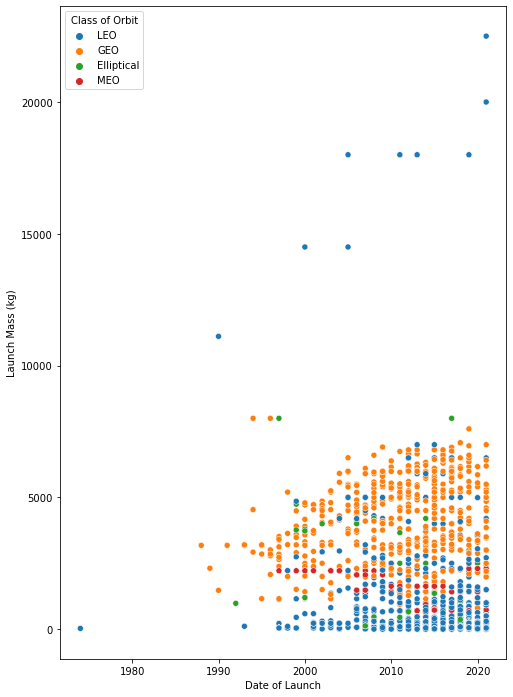

In [80]:
plt.figure(figsize = (8,12))

sns.scatterplot(y="Launch Mass (kg)",
                    x=df['Date of Launch'].dt.year,
                    hue="Class of Orbit",
                    data=df)

### 14. Expected Lifetime

In [81]:
df['Expected Lifetime (yrs)'].value_counts()

4.00     1273
5.00      580
15.00     417
3.00      239
2.00      157
12.00      86
8.00       82
10.00      81
7.00       75
1.00       21
14.00      17
13.00      12
18.00      10
11.00       6
16.00       6
20.00       5
9.00        5
0.50        4
6.00        4
0.25        3
1.50        2
30.00       2
7.25        2
17.00       1
14.50       1
25.00       1
2.50        1
12.50       1
4.50        1
Name: Expected Lifetime (yrs), dtype: int64

<AxesSubplot:xlabel='Expected Lifetime (yrs)', ylabel='Count'>

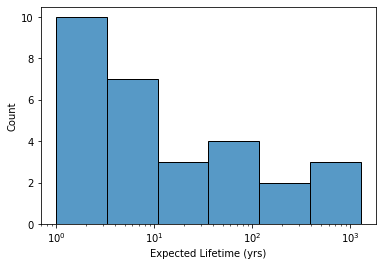

In [82]:
sns.histplot(df['Expected Lifetime (yrs)'].value_counts(), log_scale = True)

<AxesSubplot:xlabel='Launch Mass (kg)', ylabel='Expected Lifetime (yrs)'>

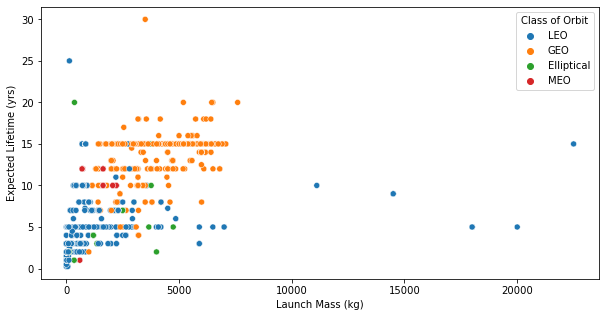

In [83]:
plt.figure(figsize = (10,5))

sns.scatterplot(y="Expected Lifetime (yrs)",
                    x="Launch Mass (kg)",
                    hue="Class of Orbit",
                    data=df)

<AxesSubplot:xlabel='Period (min)', ylabel='Expected Lifetime (yrs)'>

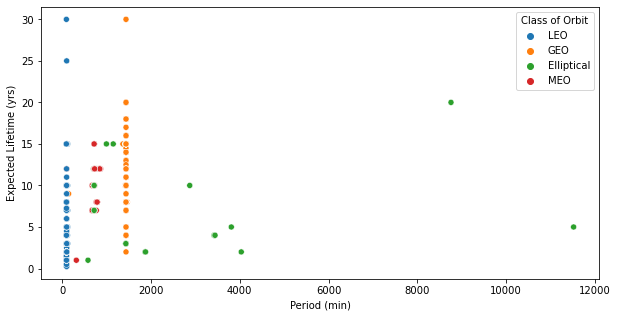

In [84]:
plt.figure(figsize = (10,5))

sns.scatterplot(y="Expected Lifetime (yrs)",
                    x="Period (min)",
                    hue="Class of Orbit",
                    data=df)

### 15. Contractor

In [85]:
df['Contractor'].value_counts()

SpaceX                                            1815
OneWeb Satellites/Airbus                           394
Planet Labs, Inc.                                  167
China Academy of Space Technology (CAST)           150
Swarm Technologies                                 119
                                                  ... 
Boeing Satellite Systems (prime)/Multinational       1
Alenia Aerospazio (and 28 subcontractors)            1
ATSB                                                 1
Northrup Grumman Information Systems                 1
Mitsubishi Heavy Industries                          1
Name: Contractor, Length: 533, dtype: int64

### 16. Country of Contractor

In [86]:
df['Country of Contractor'].value_counts()

USA                      3231
China                     497
Russia                    162
UK                        152
France                     92
                         ... 
Jordan                      1
USA/Canada                  1
ESA/EADS CASA Espacio       1
Italy/Germany               1
China/Italy                 1
Name: Country of Contractor, Length: 100, dtype: int64

### 17. Launch Site

In [87]:
df['Launch Site'].value_counts()

Cape Canaveral                           2190
Baikonur Cosmodrome                       451
Guiana Space Center                       354
Vandenberg AFB                            338
Vostochny Cosmodrome                      273
Satish Dhawan Space Centre                239
Jiuquan Satellite Launch Center           187
Taiyuan Launch Center                     165
Xichang Satellite Launch Center           154
Plesetsk Cosmodrome                       130
Rocket Lab Launch Complex 1                84
Tanegashima Space Center                   40
Dombarovsky Air Base                       37
Wallops Island Flight Facility             36
Sea Launch Odyssey                         25
Cygnus                                     20
International Space Station                19
Uchinoura Space Center                     17
Yellow Sea Launch Platform                 16
Satish Dhawan                              12
International Space Station - Cygnus       12
Orbital ATK L-1011                

### 18. Launch Vehicle

In [88]:
df['Launch Vehicle'].value_counts()

Falcon 9              2206
Soyuz-2.1b             475
PSLV                   182
Long March 2D          109
Atlas 5                107
                      ... 
Long March 2B            1
Shavit 2                 1
Zenit 2SB                1
Nanoracks Deployer       1
PSLV C5                  1
Name: Launch Vehicle, Length: 161, dtype: int64

In [89]:
#--- END ---